# Assignment 9: 
<br>

<li>Unsupervised Learning using K-Means 
    <li>Cross-Validation of the Kernel Ridge Regression (supervised model)

## Unsupervised Learning

Unsupervised machine learning is used to analyse and cluster unlabeled datasets. They are called unsupervised since they do not require additional human intervention and, thereby, learn underlying patterns, clusterings, similarities or differences themselves. In contrast, in supervised learning algorithms the label is known and through the use of clever optimization, a machine learning model is trained to reproduce the given labels as good as possible. Unsupervised machine learning algorithms are most commonly used for exploratory data analysis (EDA), recommendation systems ("customers who bought XYZ also bought items .....") and also image recognition and generation.


For this assignment, we will rely on the scikit-learn (or sklearn) Python library, which is one of the most commonly used libraries for classical machine learning. Sklearn contains various algorithms useful for classification, regression, clustering, dimensionality reduction, model selection and preprocessing. It is worth having a look at the webpage to familiarize yourself with possible tools that could be useful for any future ventures https://scikit-learn.org/stable/index.html. 


## 9.1 Unsupervised Learning: the $K-Means$ algorithm

A common unsupervised learning algorithm for clustering is $\texttt{K-Means}$. The goal of clustering is to separate datapoints into different classes. In the most simple case this can just be points in an x-y plane. In practical applications clustering can be useful for analysing images of stars, crystals or biological cells.

$\texttt{K-Means}$ works in the following way:
1. Initilization: randomly choose $k$ centroids (means).
2. Assignment: assign each sample in your dataset to the cluster with closest centroid.
3. Update: Calculate the new centroid (mean) of each cluster.

This algorithm is performed for a certain number of steps and will converge (cluster assignment will not change anymore) at a certain point. 

For a detailed description see e.g., [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering).

In [489]:
import math
import numpy as np
import matplotlib.pyplot as plt

### 1.1 
Load the dataset ex_kmeans.txt from Moodle. It contains 2 columns corresponding to $x$ and $y$ coordinates of each sample. Visualize the dataset in a scatter plot and answer how many clusters you can recognize in this dataset.

Text(0, 0.5, 'y')

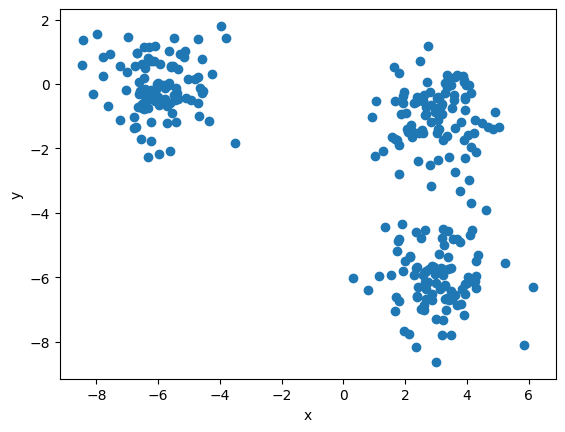

In [490]:
x, y = [], []
for line in open("ex_kmeans.txt"):
    val = line.split()
    x.append(float(val[0]))
    y.append(float(val[1]))

arr = np.column_stack([x,y])

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel("x")
ax.set_ylabel("y")

### 1.2
Implement as a costum function your own version of the $\texttt{K-Means}$-algorithm. 

At first randomly choose $k$ of your datapoints as initial centroids. 

Then, compute the euclidian-distance (L2-Norm) from each point to every centroid and assign each datapoint to the cluster with closest centroid.

With your updated clusters you can recompute the centroid of each cluster, by taking the mean of each assigned sample (these new centroinds are no longer datapoints). 

Iteratively update each cluster for a large number of iterations (e.g., 100 times), break the loop if convergence is reached ( no difference between old and the new centroids). 

In [491]:
def init_centroids(arr, k):
    """Choosing initial centroid"""

    #prevention of two same starting centroids, which btw. I've had for two out of four seeds which is 2 out of 8 to hit a 1/300 chance... Someone Binominalkoeffizient this.
    while True:

        centroids = []
        for i in range(k):
            randind1 = np.random.randint(0, len(arr[:,0]))
            centroids.append(((arr[randind1,0]), (arr[randind1,1])))
        
        #exit if uique
        dup = [i for i in centroids if centroids.count(i) > 1]
        if not len(dup):
            break

        print("Duuuuuplicate!!! You hit 2 tries for 1/300 chance on the first try.")
            

    print("Chosen centroids: ", centroids)
    return centroids

In [492]:
def subset(arr, clusterind, n, lattice=0):
    """Make Array of points in subset."""

    a = [j for j in range(len(clusterind)) if clusterind[j] == n]
    xt = [(arr[:,0])[i] for i in a]
    yt = [(arr[:,1])[i] for i in a]
    
    if lattice != 0:
        newlat = [lattice[i] for i in a]
        return np.column_stack([np.column_stack([xt,yt]),newlat])
    else:
        return np.column_stack([xt,yt])

In [493]:
def assign(arr, centroids, k):
    """Assign points to a cluster centroid."""
    
    clusterind = []
    for i in range(len(arr[:,0])):
        dist = [math.dist(((arr[:,0])[i], (arr[:,1])[i]), centroids[j]) for j in range(k)]
        clusterind.append(np.argmin(dist))

    return clusterind

In [494]:
def show(arr, ax, k, clusterind, centroids, step, l):
    """Display current clusters."""

    row, col = step//l, step%l
    colors = ["red", "blue", "green", "orange", "black"]

    #display subsets
    for i in range(k):
        sub = subset(arr, clusterind, i)
        ax[row,col].scatter(sub[:,0], sub[:,1], color = colors[i])

    #make apparent centroids
    for i, j in enumerate(centroids):
        ax[row,col].scatter(j[0], j[1], color = "black", marker="+")

    #set title
    title = "After " + str(step) + " steps"
    ax[row,col].set_title(title)
    ax[row,col].set_xlabel("x")
    ax[row,col].set_ylabel("y")

In [495]:
def update(arr, clusterind, k):
    """Update clusters once."""

    newcent = []
    for i in range(k):
        sub = subset(arr, clusterind, i)
        newcent.append((np.mean(sub[:,0]), np.mean(sub[:,1])))
    
    newind = assign(arr, newcent, k)
    
    return newcent, newind

### 1.3
Choosing an appropriate number k of clusters, perform a k-means clustering of the dataset and plot the results, showing each cluster in a seperate color.

If you did not manage to solve ex 9.1.2, use the KMeans implementation of sklearn instead via `from sklearn.cluster import KMeans`. You can use the $\texttt{.fit()}$ method on your KMeans object to perform the clustering, and access the assigned cluster labels of each sample in the .labels_ attribute of the object.

In [496]:
def k_means(k):
    """Runs k-means algorythm, surprise."""

    #initial conditions
    print(k, "centroids")
    centroids0 = init_centroids(arr, k)
    clusterind0 = assign(arr, centroids0, k)

    #setup plot
    l = 4
    fig, ax = plt.subplots(2, l, figsize=(18,8))

    #run
    centroids, clusterind = centroids0.copy(), clusterind0.copy()
    for i in range(8):
        
        #display
        show(arr, ax, k, clusterind, centroids, i, l)
        
        #update
        newcentroids, newclusterind = update(arr, clusterind, k)

        #check convergence
        conv = []
        for j in range(k):
            conv.append(math.dist(centroids[j], newcentroids[j]))

        if not max(conv):
            print("Convergence after", i, "iterations.")
            break
        
        if i == 7:
            print("Convergence not reached.")

        centroids, clusterind = newcentroids, newclusterind

In [497]:
# np.random.seed(0)
# k = 3
# k_means(k)

### 1.4 
Run the clustering a few times choosing each time a different random seed/state. Does your algorithm always converge to the "correct" clustering? What could be a reason if it does not converge "correctly", e.g. assigning the top left as two respective clusters? Give an explanation on how a different initialization method (e.g., $\texttt{K-Means++}$ https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html ) solves the problems.

In [498]:
# k_means(k)
# k_means(k)

I wanted to see the process of every iteration so I displayed them all.

For the seed 0, plot nr.2 displays the algorythms problem adequately.

If the two of the initial guesses happen to be choosen in an isolated cluster, the result is less than stellar.

Had a brief think about how to only display as many plots as needed for convergence before actually running them all... Didn't want to rewrite it to save the data of each itteration... Then realized it might be a bit difficult to determine the convergence without letting it converge iteratively. So this is how it stays. For different seeds sometimes takes more than 7 steps to converge but that just gets cut off, as there almost isn't any meaningful change happening at that point anyway.

## 9.2 $\textbf{Clustering of Lattice Keypoints.}$ 

In this exercise we are going to apply clustering to a set of descriptors of keypoints in a microscopy image. The keypoints and descriptors can be generate via a computer-vision algorithm called SIFT, that detects keypoints and stores local image information in a descriptor. These descriptors can be further analyzed in an unsupervised learning setting to seperate different sublattices in the image.

### 2.1
Load the data from " microscopy_img.pkl " found on Moodle, using $\texttt{pickle}$. The file contains a dictionary with an image, keypoints, and one descriptor for each keypoint that describes some local image information. Each keypoint contains $x$- and $y$-coordinates of a lattice site in the image. The corresponding descriptors will later be used in a clustering algorithm to seperate features of your microscopy image into different clusters.

In [499]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_pickle("microscopy_img.pkl")
x, y, lattice = df["keypoints"].T.tolist()

scale = 1.8
lattice = [i*scale for i in lattice]

### 2.2
Make a plot of two subplots to visualize the image and the image with the positions and size of the detected keypoints on top, respectively. Consider using $\texttt{plt.imshow}$ and $\texttt{plt.scatter}$. 

$\textbf{Hint:}$ The keypoints array contains three columns, corresponding to $\texttt{x}$-, $\texttt{y}$-positions and the size of the detected keypoint. You can also rescale the size, for better visualization.

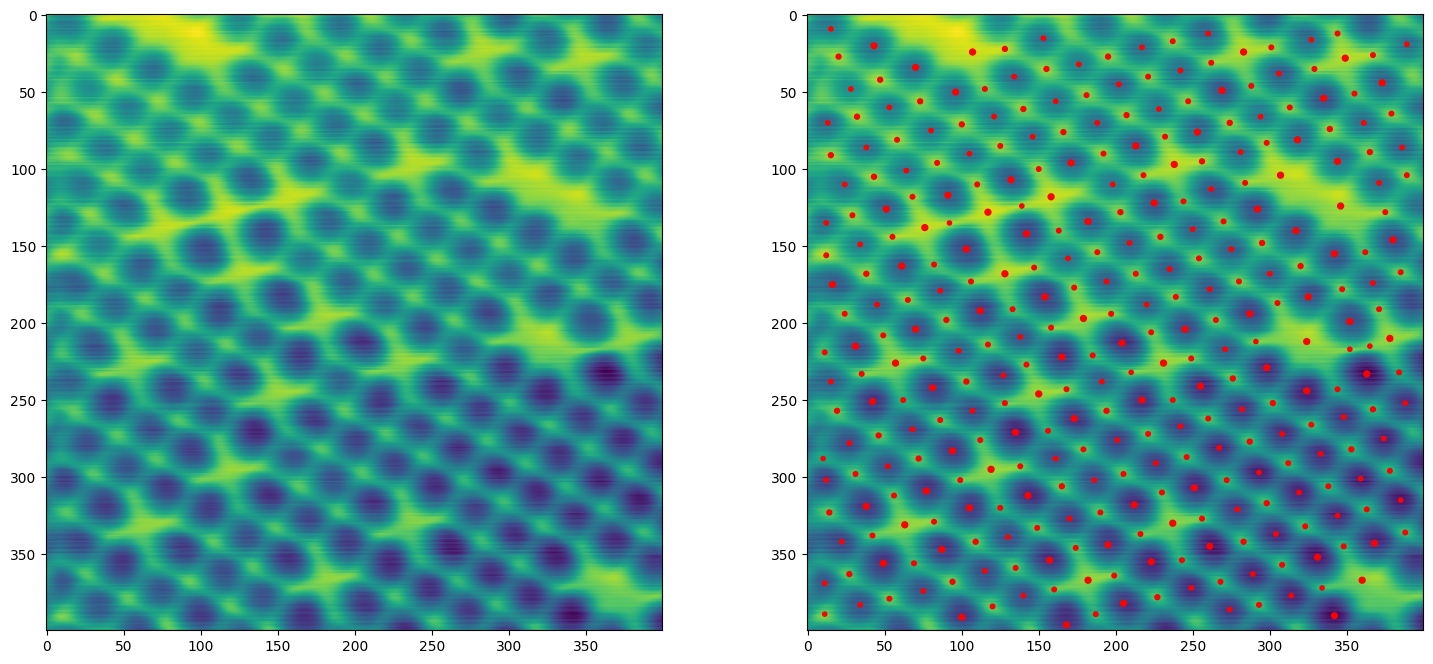

In [500]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
ax[0].imshow(df["image"])
ax[1].imshow(df["image"])
ax[1].scatter(x,y,lattice,color="r")

### 2.3 
Perform a clustering of the descriptors using $\texttt{sklearn.cluster.KMeans}$ (it provides better initialization methods than our custom implementation) by initializing $k=2$ and visualize the result by plotting each cluster in a seperate color in the image. By setting $k=2$, light and dark keypoints should be nicely seperated. 

Hint: You can use the .fit() method on your clustering object to perform the clustering, and access the assigned cluster labels of each sample in the .labels_ attribute of the object.


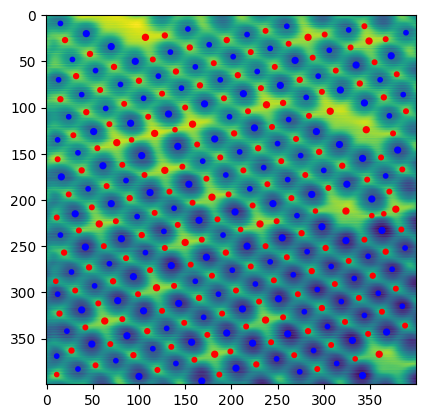

In [501]:
from sklearn.cluster import KMeans
from sklearn import model_selection

def kmeans_fun(k):
    kmeans = KMeans(k, random_state=0, n_init="auto").fit(df["descriptors"])

    colors = ["r", "b", "black", "green", "white", "y"]

    plt.imshow(df["image"])
    sub = []
    for i in range(k):
        sub.append(subset(df["keypoints"], kmeans.labels_, i, lattice))
        plt.scatter(sub[i][:,0], sub[i][:,1], sub[i][:,2], color=colors[i])

kmeans_fun(2)

### 2.4 
Try to further optimize your clustering by varying your number of clusters $k$ in the $\texttt{K-Means}$-algorithm and visualize the predicted clusters in your image.

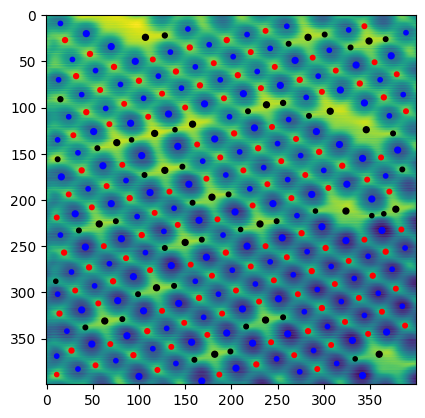

In [502]:
kmeans_fun(3)

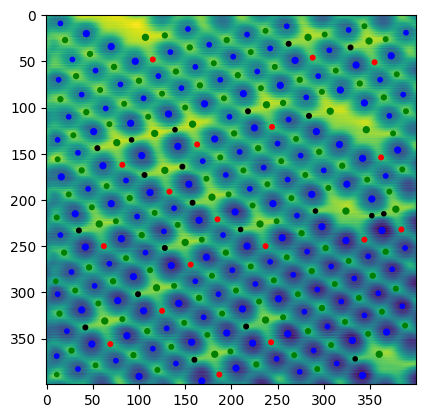

In [503]:
kmeans_fun(4)

### 2.5
Give an explanation on why you would choose a certain $k$ as optimal. What quantitative information can you extract by seperating your keypoints in clusters? What information could you extract by looking only at the cluster containing the largest amount of samples?

k = 3 seems to be the most reasonable choice. There's a clear difference between each colour. The points of the highest intensity are marked in a third colour.

For k = 4 things are less clear. There isn't as clear a pattern to the colours.



Kmeans will, for sufficiently high k and multiple runs most of the time give as the largest sample, the part of the data that is the clearest to be distinguished. In this case it represents in blue, the background intensity of the grid.

## 9.3 $\textbf{Cross Validation }$ 
In this exercise we are going to build a regression model to predict the bonding energy of two hydrogen atoms based on their bond length. Machine learning to accurately predict quantum chemical properties of molecules and materials is an active field of research. Conventionally, such quantum properties are calculated using methods to approximate solutions to Schrödingers equation, which depending on the level of theory take hours, to days, to months to compute. Supervised machine learning algorithms in that regard hold the promise to massively accelerate this process yielding models with milliseconds of execution time, while being as accurate as quantum mechanical approximations that take magnitudes longer to compute.

As a regression model, we are going to use the supervised machine learning algorithm Kernel-Ridge-Regression (KRR), which combines ridge regression (linear least squares with l2-norm regularization) with the so called 'kernel trick'. The word 'kernel' is used in mathematics to denote a weighting function for a weighted sum or integral.

In ridge regression, a mapping function is learned, relating a representation vector $\textbf{x}$ to a label $y$.
The 'kernel trick' renders the problem linear through the use of kernel functions that yield the inner product of high dimensional representations $\textbf{x}$.
In practice, KRR is formulated as follows:

$$    y(\textbf{x}_{q}) = \sum^N_i w_i \;  K(\textbf{x}_i, \textbf{x}_{q}) $$

with $w_i$ being the regression coefficient, $\textbf{x}_i$ being the i-th representation vector of the training set, $\textbf{x}_q$ being the query representation and kernel function $K$. 
The regression coefficients $w$ are calculated through a closed-form solution:

$$ w = (\textbf{K} + \alpha \textbf{I})^{-1} \textbf{y}^{\textrm{train}} $$

with the identity matrix $\textbf{I}$ and a regularization coefficient $\alpha$. 
The purpose of the regularization coefficient is to prevent overly large regression weights and, thus, overfitting to the training data.
The radial-basis function kernel is a popular choice and has the following form:

$$      K(\textbf{x}_i, \textbf{x}_j) = \exp\left(-\frac{||\textbf{x}_i - \textbf{x}_j||^2_2}{2\sigma^2}\right) $$

with $\gamma$ being the kernel width.

This leaves us with two hyperparameters, the regularization strength $\alpha$ and the kernel width $\gamma$, which have to be determined through a process called hyperparameter optimization. Note, the notation $\alpha$ and $\gamma$ can be named differently in publications or Python libraries, in this exercise we stick to the sklearn convention. Our goal is to find the optimal values that yield the best possible performance. However, we do not want to overfit our model to our dataset and, thus, lose generality. 

To avoid this, we will use cross-validation and out-of-sample-testing. In general, cross-validation is a resampling method using different portions of the data to test and train a model on different iterations. You can read more about cross-validation procedures [here](https://scikit-learn.org/stable/modules/cross_validation.html).
First, the whole dataset is split into a training and test set. Common ratio's are 80/20 or 70/30 (in reality this obviously depends on your total dataset size and distributions). We use the training set to optimize the hyperparameters via cross-validation and then test the final model performance on the separate test-dataset. It is very important to be precise here, accidentally optimizing the hyperparameters on the test set or testing on the training set leads to massively overoptimistic results! It is important to always be sceptical when your results are 'too good to be true'.

### 3.1
The training and test split has already been prepared and can be found on Moodle in the files h2_train.txt and h2_test.txt. Both files contain the energies an $H_2$ molecule as a function of the bond length. 

The testing data contains some randomly chosen points, on which you can perform a final test on your models generality. Load the data and plot both datasets into a single plot.

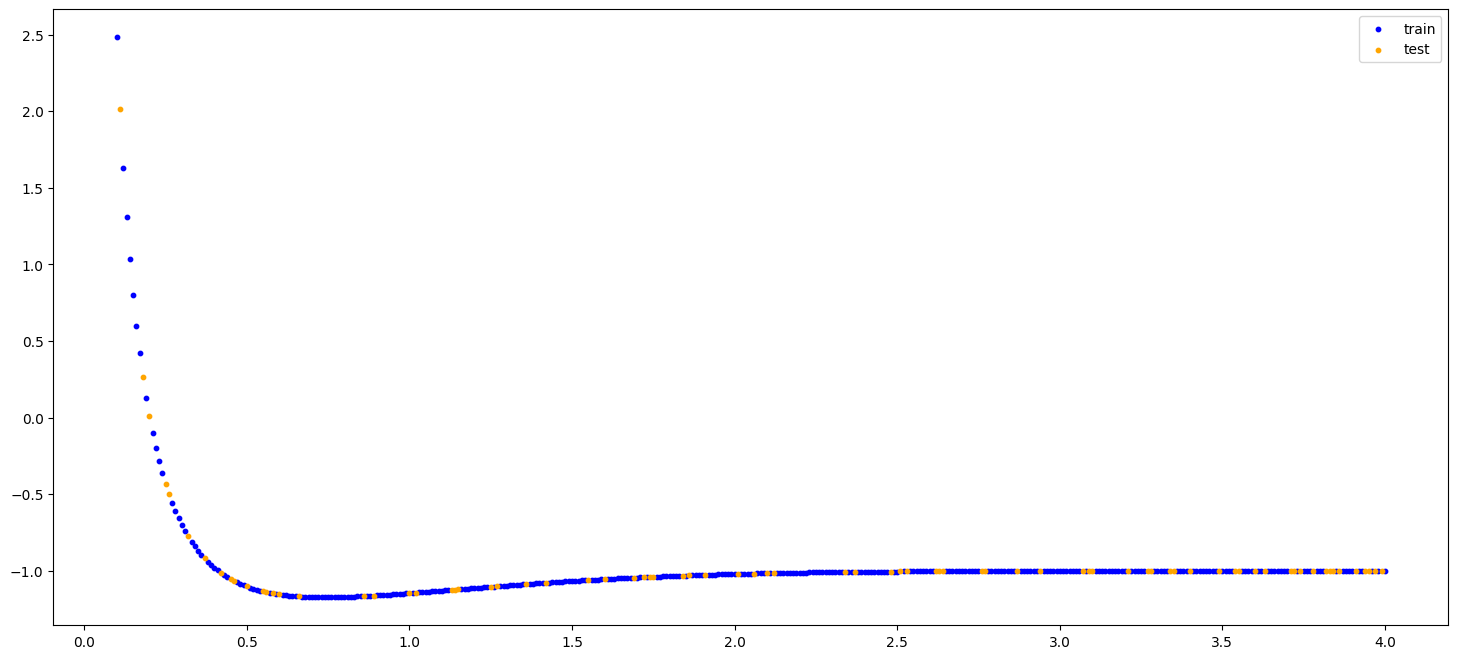

In [504]:
x = []
y = []
for line in open("h2_train.txt"):
    val = line.split()
    x.append(float(val[0]))
    y.append(float(val[1]))
arr1 = np.column_stack([x,y])

x = []
y = []
for line in open("h2_test.txt"):
    val = line.split()
    x.append(float(val[0]))
    y.append(float(val[1]))

arr2 = np.column_stack([x,y])

plt.subplots(figsize = (18,8))
plt.scatter(arr1[:,0], arr1[:,1], s = 10, color = "b")
plt.scatter(arr2[:,0], arr2[:,1], s = 10, color = "orange")
plt.legend(["train", "test"])

### 3.2 
To choose an optimal regression model predicting our data, we need to optimize it's hyperparameters. This can be done by performing k-fold cross-validation on our training data. In k-fold cross-validation, the dataset is split into k-folds, each containing some portion of the entire dataset. By training the model $k$ times on $k-1$ of these folds and validating it on the remaining fold, we can assess the mean score and it's standard deviation for the case of training and validation data. 

Use the [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) class of sklearn to split your data into 5-splits.
Make a plot containing a 5x2 subplot grid to visualize the histograms of train and validation features and labels of each split, respectively.

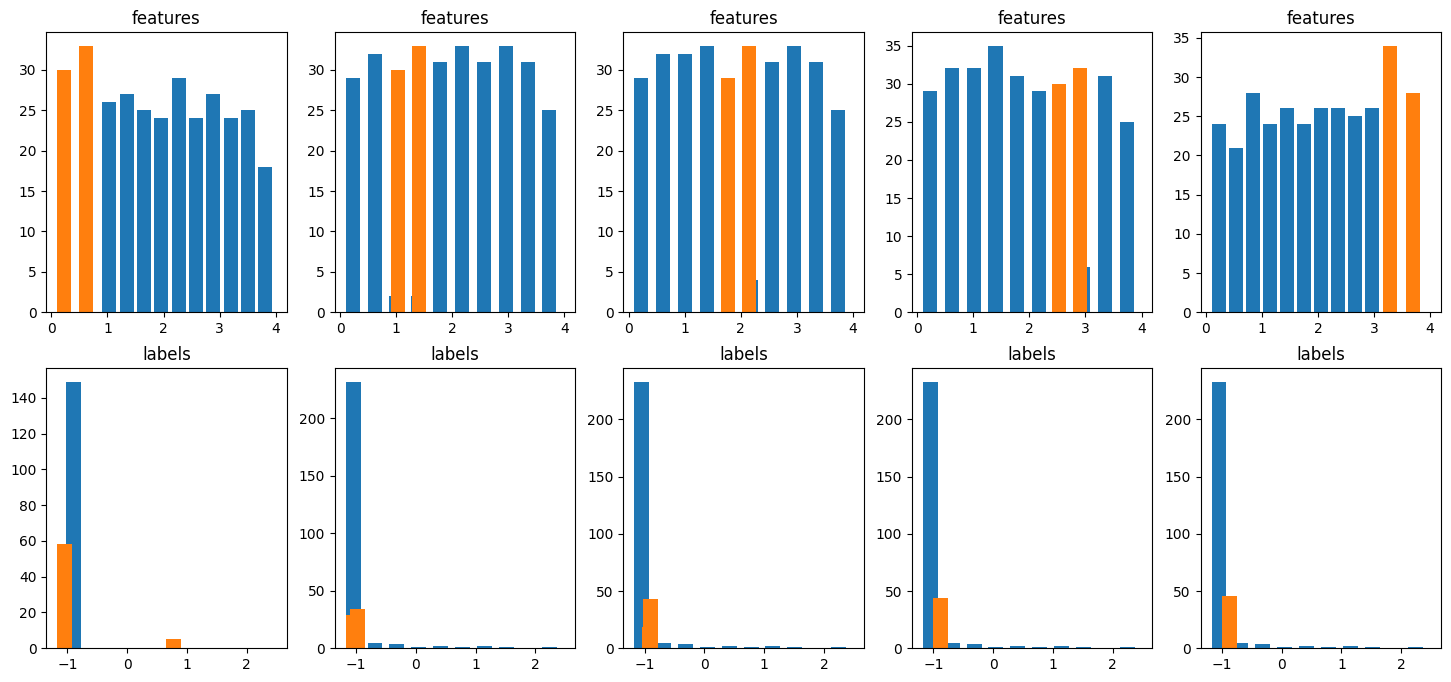

In [505]:
kf = model_selection.KFold()
kf.get_n_splits(arr1)

fig, ax = plt.subplots(2,5,figsize=(18,8))
bin = 10
for i, (train_index, test_index) in enumerate(kf.split(arr1)):

    ax[0,i].hist(arr1[:,0][train_index], bins=bin, width = 0.25)
    ax[0,i].hist(arr1[:,0][test_index], bins=2, width = 0.25)
    ax[0,i].set_title("features")
    ax[1,i].hist(arr1[:,1][train_index], bins=bin, width = 0.25)
    ax[1,i].hist(arr1[:,1][test_index], bins=2, width = 0.25)
    ax[1,i].set_title("labels")

If this is not what the instructions mean, then I don't know.

### 3.3

Why can it be helpful to visualize these distributions, especially the label distribution?



*   Helpful in low data scenarios, different splits can lead to large performance differences
*   Helps to assess whether you are extrapolating. If your label is at the tail of the distribution it will be hard
*   You could also consider to truncate your dataset based on the distribution, think about outliers from experimental measurements


yes. this.

### 3.4 

Use sklearn.kernel_ridge.KernelRidge to fit a model and optimize the regularization-parameter (alpha in the regression object) and the kernel-parameter (gamma) by performing cross validation. Use an radial basis function kernel, which takes following form

$$ K(\textbf{x}_i, \textbf{x}_j) = \exp\left(-\gamma||\textbf{x}_i - \textbf{x}_j||^2\right) $$
by choosing kernel='rbf'. 


First, fix gamma and vary alpha over multiple orders of magnitude. To asses the fitting quality, use the KernelRidge.score(x,y) method (Hint: a score of 1 corresponds to a perfect fit and the score can get arbitrarily worse; see $R^2$-score). After that, fix alpha to an optimal value and determine the optimal gamma by repeating the procedure.

Plot your results in two subplots showing the mean R2 score and it's standard deviation (errorbars) as a function of alpha and gamma, respectively.

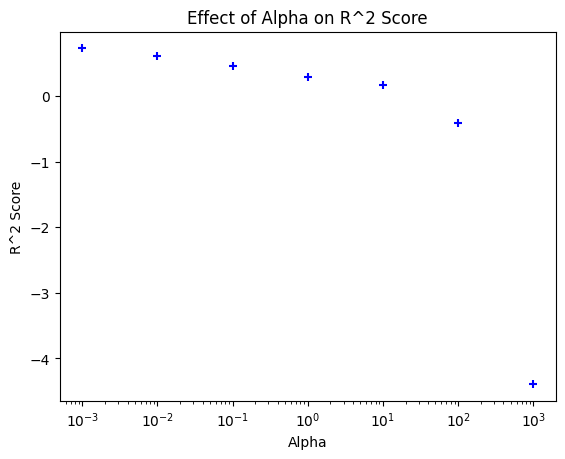

In [506]:
from sklearn.kernel_ridge import KernelRidge

x = arr1[:,0].reshape(-1,1)
y = arr1[:,1].reshape(-1,1)

alphas = np.logspace(-3, 3, 7) 
gammas = np.logspace(-3, 3, 7) 

scores = []
for i in alphas:
    model = KernelRidge(alpha = i, kernel='rbf', gamma=0.1)
    model.fit(x,y)
    r2 = model.score(x,y)
    scores.append(r2)

plt.scatter(alphas, scores, marker = "+", color="b")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R^2 Score")
plt.title("Effect of Alpha on R^2 Score")
plt.show()

0.1 10.0


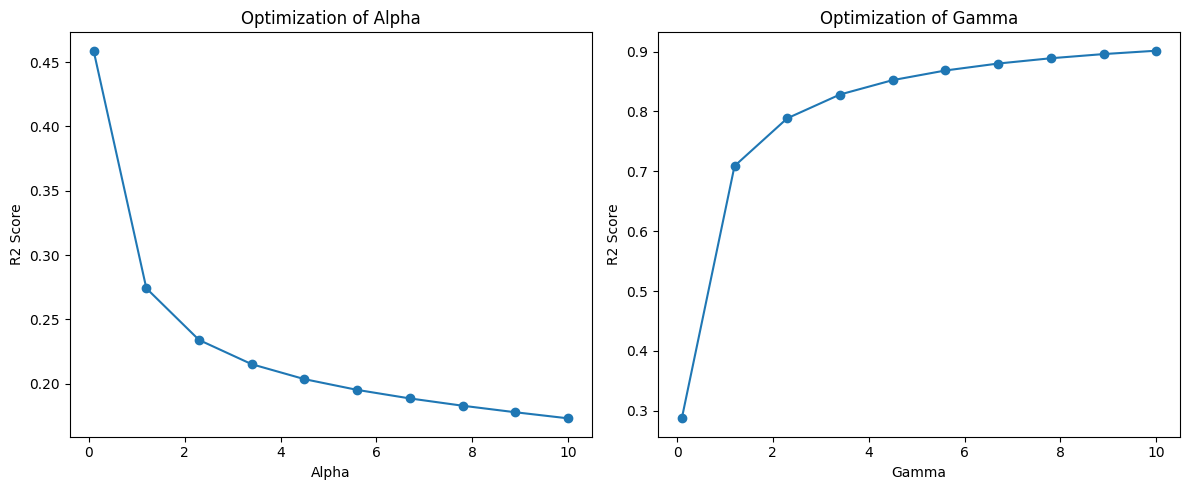

0.010000000000000002 45.0


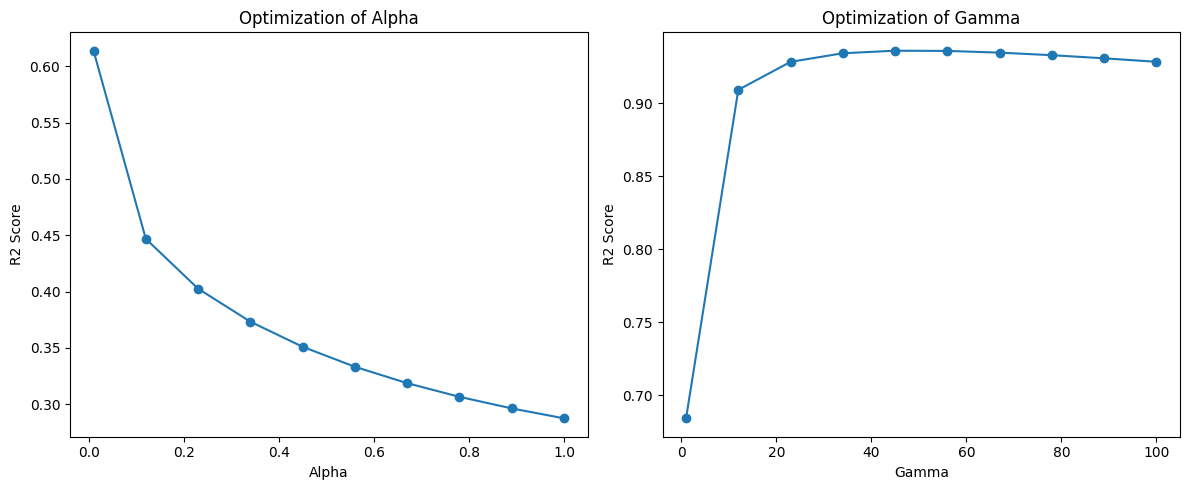

0.0010000000000000002 54.0


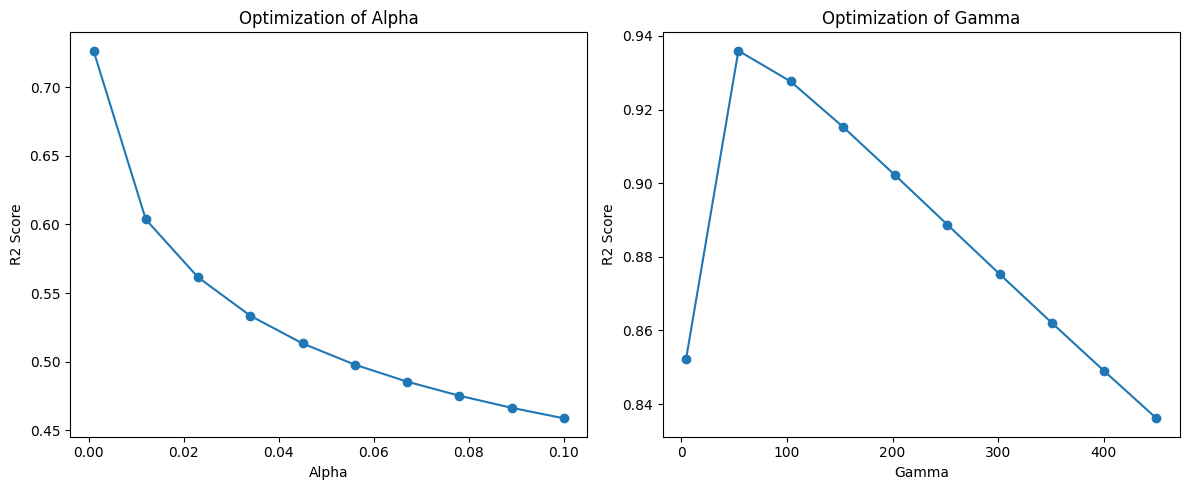

0.00010000000000000003 64.80000000000001


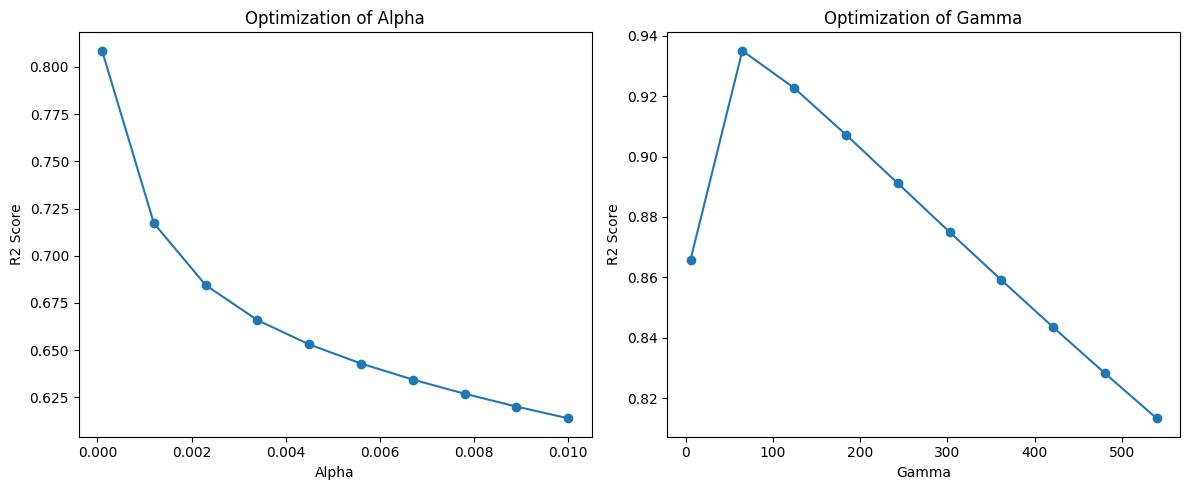

1.0000000000000004e-05 77.76000000000002


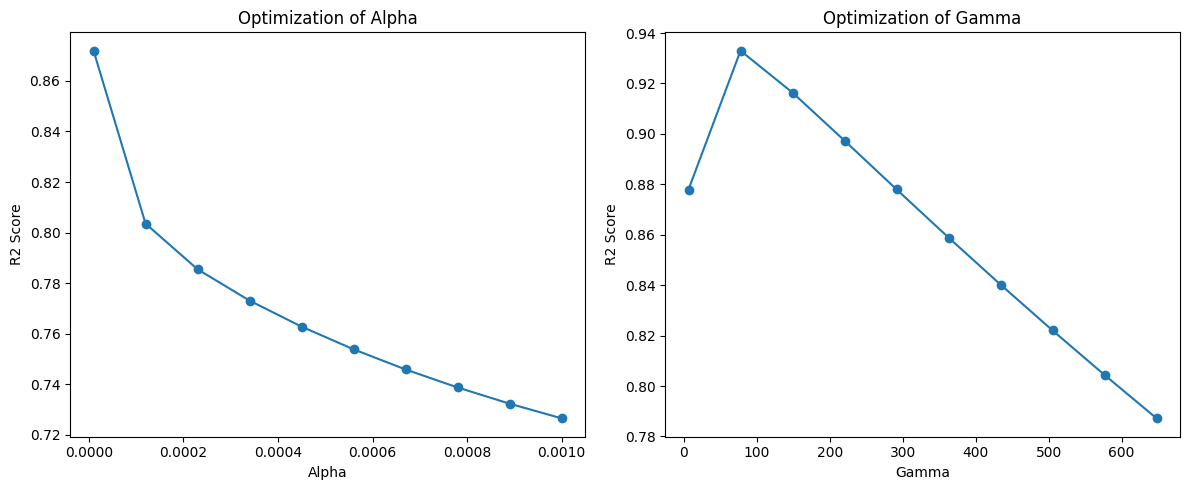

1.0000000000000004e-06 93.31200000000001


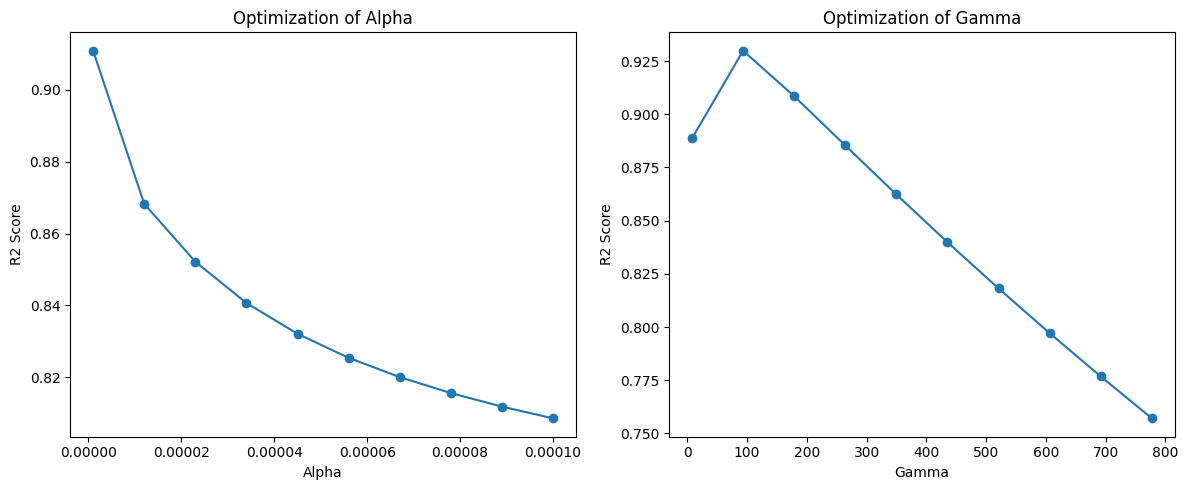

1.0000000000000005e-07 111.97440000000002


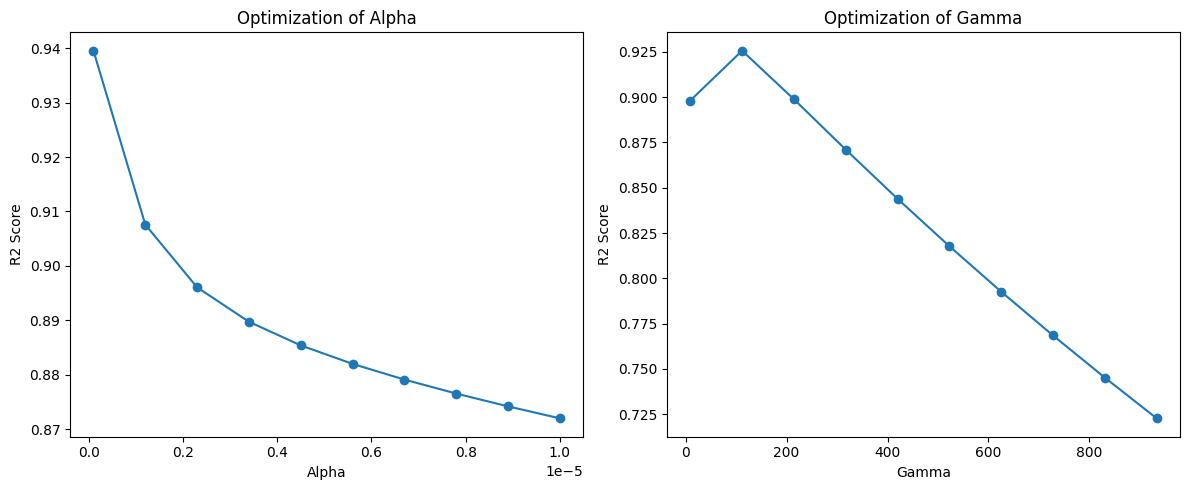

1.0000000000000005e-08 134.36928000000003


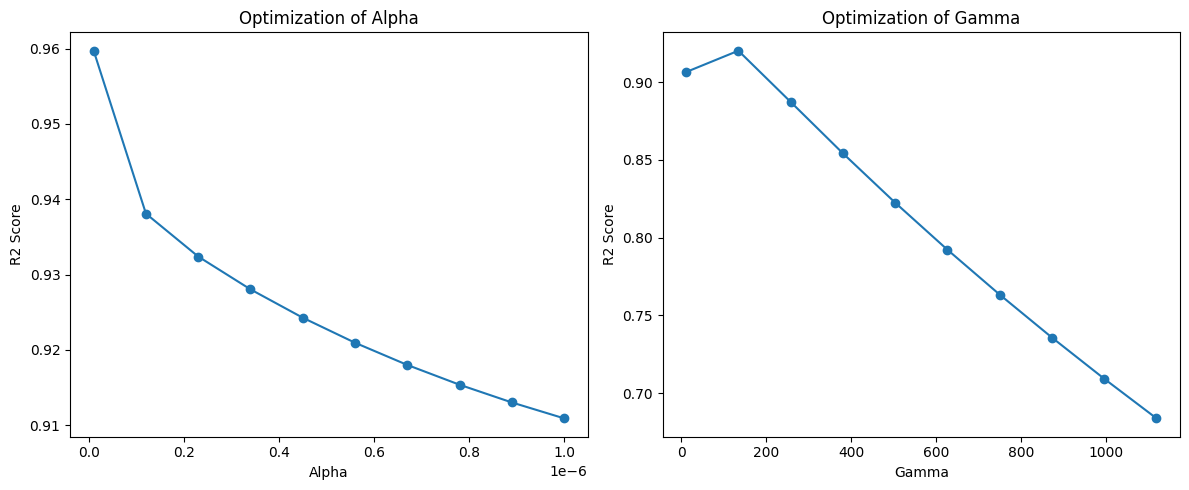

1.0000000000000005e-09 13.436928000000004


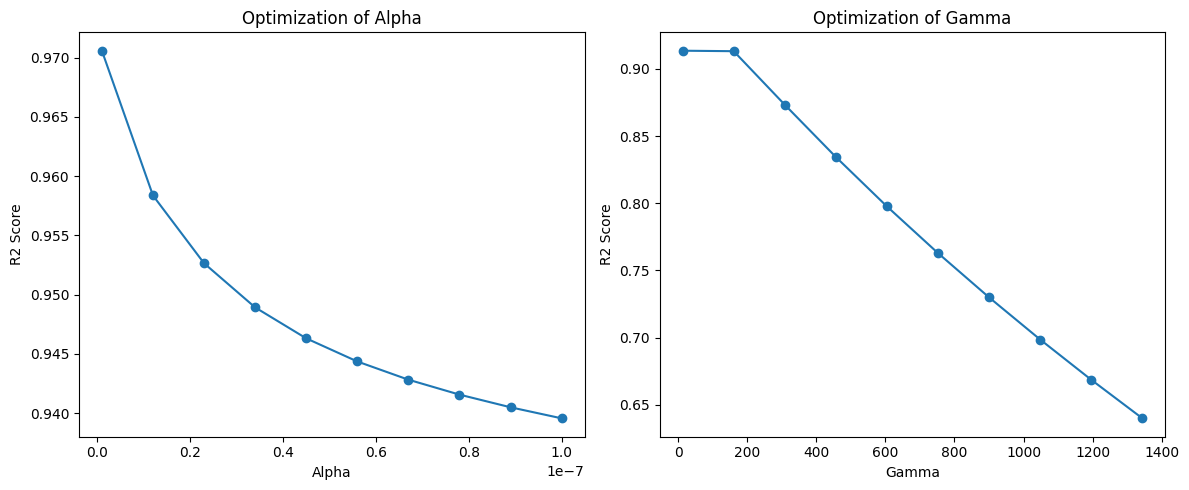

1.0000000000000006e-10 45.6855552


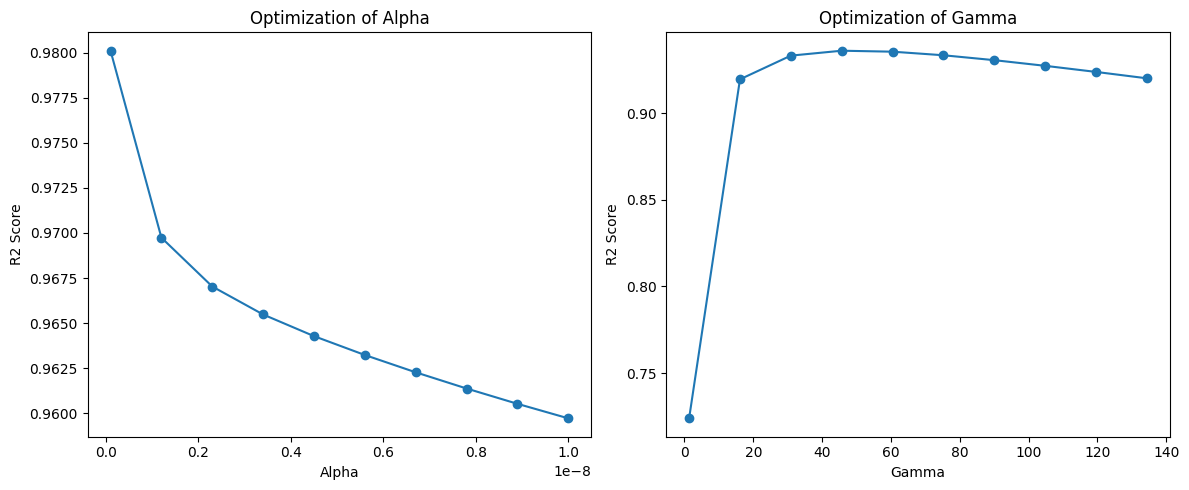

In [507]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

def opt(w, inalph=1, ingamma=1):
    alphas = np.linspace(inalph*0.1, inalph*10, 10) 
    gammas = np.linspace(ingamma*0.1, ingamma*10, 10)
    
    alpha_scores = np.zeros(len(alphas))
    gamma_scores = np.zeros(len(gammas))

    # Optimize alpha
    for i, alpha in enumerate(alphas):
        model = KernelRidge(alpha=alpha, kernel='rbf', gamma=0.1)
        model.fit(x, y)
        alpha_scores[i] = model.score(x, y)

    # Optimize gamma
    for j, gamma in enumerate(gammas):
        model = KernelRidge(alpha=1.0, kernel='rbf', gamma=gamma)
        model.fit(x, y)
        gamma_scores[j] = model.score(x, y)
        
    print(alphas[np.argmax(alpha_scores)], gammas[np.argmax(gamma_scores)])
    # Plot the results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot alpha optimization results
    ax1.plot(alphas, alpha_scores, marker='o')
    ax1.set_xlabel('Alpha')
    ax1.set_ylabel('R2 Score')
    ax1.set_title('Optimization of Alpha')

    # Plot gamma optimization results
    ax2.plot(gammas, gamma_scores, marker='o')
    ax2.set_xlabel('Gamma')
    ax2.set_ylabel('R2 Score')
    ax2.set_title('Optimization of Gamma')

    plt.tight_layout()
    plt.show()

    return alphas[np.argmax(alpha_scores)], gammas[np.argmax(gamma_scores)]

a,b = 1,1
for i in range(10):
    w = b * (10/(i+1)**2)

    a, b = opt(w,a,b)





as the fit quality seems to improve for alpha going towards zwero i mustve understood something wrong and looking at the last of the itteratively plotted graphs, in an attempt to tune both factors pair wise multiple times I also did that in a way that just doesnt make much of any sense. But oh well. Iv no tim eoh shit

### 3.5 
Use the optimal values for $\texttt{alpha}$ and $\texttt{gamma}$ to retrain your regressor on the full training dataset and predict the test data set to check if your method worked and provides a good fit. 

For this create a plot of two subplots showing the true values against the predicted values in a scatter plot, for the training and the test data respectively.

### 3.6
Instead of doing a grid based hyperparameter search we could have done a random search, varying both variables randomly for n-times. What are some advantages or disadvantages of grid vs. random search? What other approaches you could think of?